# Zadanie 1

## Przygotowywania do zadania 

### Wczytywanie potrzebnych bibliotek

In [22]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.stats.diagnostic as stg

### Ustawianie globalnych danych

Ustawiam tutaj, dane które są uniwersalne dla każdego testu, to znaczy:

1. Liczba stopni swobody
2. Liczba danych
3. Liczba symulacji, które wykonam
4. Poziom istnotności


In [23]:
np.random.seed(seed=123)

# Zakres stopni swobody, jakie zaprezentuję na wykresie
stopnie_swobody = range(1, 50, 1)  # Zakres od 1-50 co 1
# Ustalam poziom istotności
poziom_istotnosci = 0.05
# Liczba danych dla jakich wykonam symulacje
liczby_danych = [10, 20, 50, 100, 200]
# Liczba symulacji na jakich będę bazować
liczba_symulacji = 5000

## Badanie 

### Potrzebne funkcje 

Tutaj stworzę wszystkie funkcje, które wykorzystam do badania, przy okazji opisując od razu ich działanie. Następnie przy symulacji badania, będą one tylko wywoływane. Funkcje zaczynają się od najbardziej ogólnej i idą w dół razem z programem(idziemy po kolei tak samo jak program).

#### Funkcja obliczania mocy testu 

Najogólniejsza funkcja, która przygotuje dane, które wykorzystam, aby zrobić symulacje w funkcji symulacja. Więc ustalamy liczbę danych oraz stopień swobody i idziemy dalej przekazując parametry dalej do funkcji. Po symulacji dodajemy wynik do tablicy i idziemy dalej.

Argumenty: 
- test - Mówi który test jest symulowany

Funkcja będzie zwracać tablice 2D(i,j), która zbierała dane dla i-tej liczbie danych oraz j-tych stopni swobody.



In [24]:
def obliczanie_mocy_testu(test):
    # Tablica, która zbierze mi moce testów, które zwróci
    moce_testow = []

    # Dla każdej liczby z liczby_danych
    for l_danych in liczby_danych:
        """
        Tworzę nową tablicę która przechowuję wyniki mocu testu dla i-tej liczby danych. Lista przechowuje wyniki dla każdego j-stopnia
        swoobody w stopnie_swobody. Wykorzystuje List Comprahension, żeby umilic kod
        """
        moce_testow.append([symulacja(l_danych,s_stopien,test) for s_stopien in stopnie_swobody])

    # Zwracam w.w tablice
    return moce_testow

#### Funkcja symulacji 

Ustaliliśmy już liczbę danych oraz liczbe stopni swobody dla naszych danych. 
W tej funkcji będziemy generować dane z rozkładu t-studenta dokładnie z tymi parametrami, przekazanymi jako argumenty. 
Następnie prześlemy je do funkcji, która wybierze, który test jest obecnie symulowany i wynik tej funkcji będziemy sumować w zmiennej 
suma_odrzucen_H0.

Argumenty:
- l_danych - Ile danych będziemy losować z rozkładu t-studenta 
- s_stopien - Liczba stopni swobody dla rozkładu t-studenta
- test - Jaki test jest obecnie symulowany

Funkcja będzie zwracać odsetek w jakim odrzuciłem hipotezę zerową dla podanych parametrów

In [25]:
def symulacja(l_danych,s_stopien,test):
    # W tej zmiennej będę sumował ile razy odrzuciłem hipotezę zerową dla danego zestawu 
    suma_odrzucenia_H0 = 0

    # Tutaj będzie symulacja
    for k in range(liczba_symulacji):
        # Tworzę próbkę danych z rozkładu t-Studenta o l_danych wielkości oraz s_stopien stopni swobody
        probka = stats.t.rvs(s_stopien,size=l_danych)

        # Następnie przekazuje wszystkie dane, aby wybrac który test jest symulowany i dowiedzieć się jaki jest wynik testu
        suma_odrzucenia_H0 += wybor_testu(probka,test)

    # Zwracam odsetek odrzucenia hipotezy zerowej
    return suma_odrzucenia_H0/liczba_symulacji

#### Funkcja wyboru testu 

Funkcja za argumenty przyjmuje wszystkie dane, które są jej potrzebne do wybrania oraz przeprowadzenia danego testu. 
Argumenty, to:
- test - Jaki test ma zostać wykonany
- probka - Zestandaryzowany zestaw danych, które będziemy badać

Funkcja będzie zwracać 1 lub 0 w zależności od wyniku testu(1-odrzucamy test, 0-nie ma podstaw)

In [26]:
def wybor_testu(probka,test):

    """
    Ogólna zasada działania testów:

    Jeżeli pvalue z danego testu jest mniejsze niż wczesniej ustalony poziom istotnotnosci to odrucamy 
    Hipoteze zerowa co znaczy ze zwracamy wartość 1. W przeciwnym wypadku zwracamy 0
    
    """

    # Najpierw podejmiemy wybór jaki test mamy wykonać

    # Test Shapiro
    if test == "shapiro": 
        if stats.shapiro(probka).pvalue < poziom_istotnosci: return 1
    
    # Test Lillieforsa
    elif test == "lil":
        _ ,pvalue = stg.lilliefors(probka,'norm')
        if pvalue < poziom_istotnosci: return 1

    # Test  Jarque-Bera
    elif test == "jb":
        if stats.jarque_bera(probka).pvalue < poziom_istotnosci: return 1
    
    # Jeżeli do tej pory nie zwrócono 1 to znaczy, że żaden z testów nie odrzucił H0 więc możemy zwrócic 0
    return 0
            


## Symulacja

In [27]:
moc_shapiro = obliczanie_mocy_testu("shapiro")
moc_jb = obliczanie_mocy_testu("jb")
moc_lil = obliczanie_mocy_testu("lil")

## Wnioski 

### Test Shapiro Wilka 

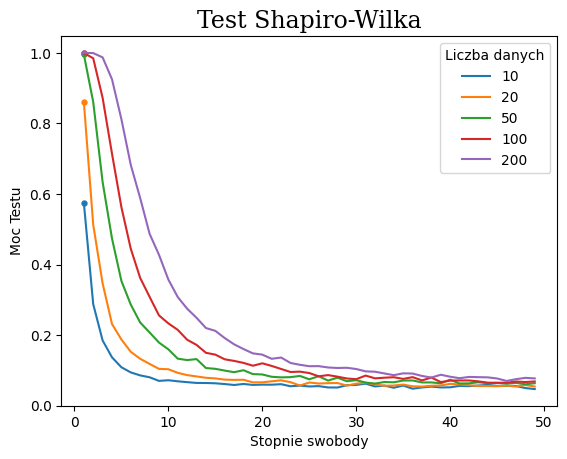

In [28]:
# Tworzę podstawkę do wykresu 
wykres_shapiro = plt.figure()


# Dodaje dane do wykresu 
for i,moc in enumerate(moc_shapiro):
    plt.plot(stopnie_swobody,moc,label= str(liczby_danych[i]))
    # Dodaję punkt dla pierwszego elementu
    plt.scatter(stopnie_swobody[0], moc[0], s=50, marker='.') 


# Czcionka dla tytulu
font_title = {'family' :'serif','size':17}

# Dodaje opisy do wykresu 
plt.xlabel("Stopnie swobody")
plt.ylabel("Moc Testu")
plt.title("Test Shapiro-Wilka",fontdict=font_title)
plt.legend(title="Liczba danych")
plt.ylim(0)
plt.show()

### Wnioski
Wraz ze wzrostem liczby danych wzrasta także moc testu, aczkolwiek wraz ze wzrostem stopni liczby swobody w rozkładzie t-studenta moc testu spada i dąży do wartości 0.05(co jest równe poziomowi istotności ustalonemu dla tego testu). Z wykresu widzimy, że moc testu słabnie hiperbolicznie, dla stopnii swobody > 30, możemy zauważyć, że liczba danych przestaje mieć znaczenie, a dla stopni swobody > 45, liczba danych nie ma już żadnego znaczenia dla mocy testu. Test wydaje się być miarodajny i wiarygodny, ze względu na to, że wraz ze wzrostem stopni swobody w rozkładzie t-studenta możemy estymować go rozkładem normalnym. Umowna wartość od której możemy go estymować to n > 30, co zgadzałoby się z wykresem i wcześniejszym rozumowaniem



### Test Lillieforsa

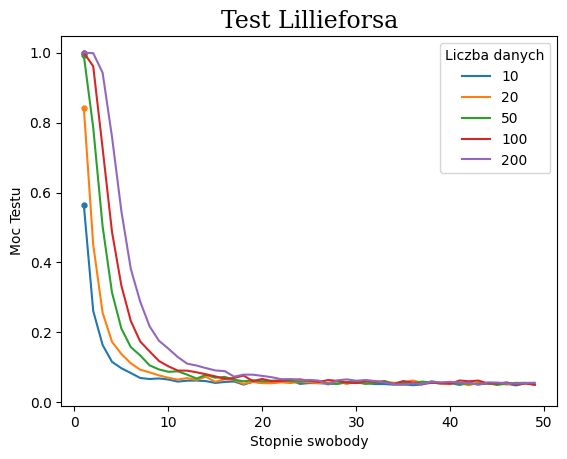

In [29]:
# Tworzę wykres

wykres_kolgo = plt.figure()

# Dodaje dane do wykres
for i,moc in enumerate(moc_lil):
    plt.plot(stopnie_swobody,moc,label= str(liczby_danych[i]))
    plt.scatter(stopnie_swobody[0], moc[0], s=50, marker='.') 



# Dodaje opisy do wykresu 
plt.xlabel("Stopnie swobody")
plt.ylabel("Moc Testu")
plt.title("Test Lillieforsa",fontdict=font_title)
plt.legend(title="Liczba danych")
plt.ylim(-0.01)
plt.show()

### Wnioski

Test Lillieforsa jest bardzo zbliżony do testu Shapiro-Wilka, jednak różnice widać dla stopni swoobody od 1 do 30, ponieważ jest zdecydowana różnica w mocy testu dla różnej liczby obserwacji, test Lillieforsa ma znacząco mniejsze różnice między różnymi liczbami obserwacjmi od testu Shapiro. Oprócz tej różnicy wykresy mocy testu wyglądają praktycznie tak samo, więc można stwierdzić, że test Lillieforsa jest wiarygodny i miarodajny.  

### Test Jarque-Bera

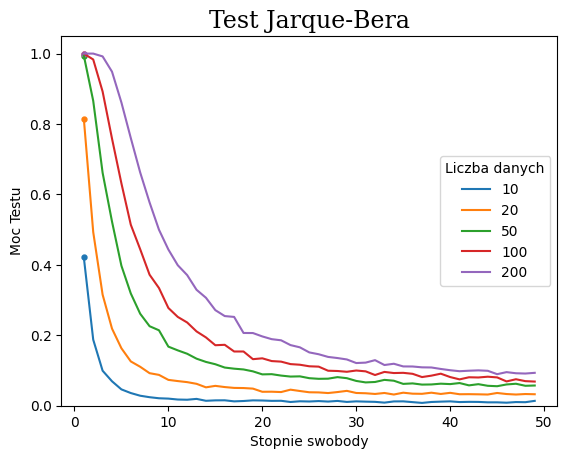

In [30]:
wykres_chi = plt.figure()

# Dodaje dane do wykresu
for i,moc in enumerate(moc_jb):
    plt.plot(stopnie_swobody,moc,label= str(liczby_danych[i]))
    plt.scatter(stopnie_swobody[0], moc[0], s=50, marker='.') 

# Dodaje opisy do wykresu 
plt.xlabel("Stopnie swobody")
plt.ylabel("Moc Testu")
plt.title("Test Jarque-Bera",fontdict=font_title)
plt.legend(title="Liczba danych",loc="center right")
plt.ylim(0,)
plt.show()

#### Wnioski

Test Jarque-Bera jest bardzo zbliżony do testu Shapiro-Wilka, jednak różnice widać dla stopni swoobody od 1 do 30, ponieważ jest zdecydowana różnica w mocy testu dla różnej liczby obserwacji, test Jarque-Bera ma znacząco większe różnice między różnymi liczbami obserwacjmi od testu Shapiro. Oprócz tej różnicy wykresy mocy testu wyglądają praktycznie tak samo, więc można stwierdzić, że test Jarque-Bera jest wiarygodny i miarodajny.  


## Porównanie 
Wyliczę średnią moc każdego z testów dla każdego stopnia swobody, co pomoże pokazać mi różnice.


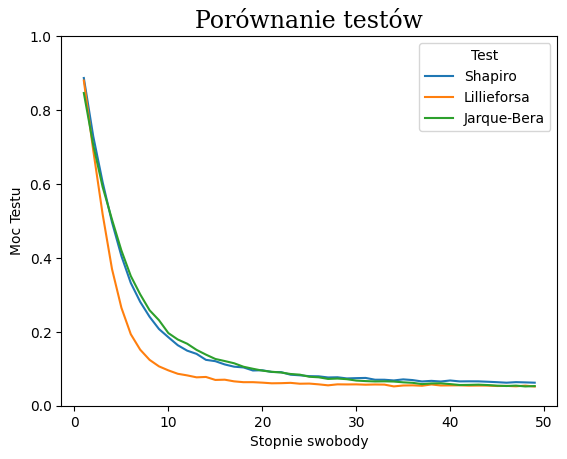

In [31]:
# Tworzenie tablic w których będę trzymał średnie 
srednia_moc_shapiro = np.zeros(len(stopnie_swobody))
srednia_moc_lil = np.zeros(len(stopnie_swobody))
srednia_moc_jb = np.zeros(len(stopnie_swobody))

# Sumowanie mocy 
for i in range(len(moc_shapiro)):
    srednia_moc_shapiro += moc_shapiro[i]
    srednia_moc_lil += moc_lil[i]
    srednia_moc_jb += moc_jb[i]

# Wyliczanie średnia 
srednia_moc_shapiro /= len(moc_shapiro)
srednia_moc_jb /= len(moc_jb)
srednia_moc_lil /= len(moc_lil)

# Tworzenie wykresu 
w = plt.figure()
plt.plot(stopnie_swobody,srednia_moc_shapiro,label="Shapiro")
plt.plot(stopnie_swobody,srednia_moc_lil,label = "Lillieforsa")
plt.plot(stopnie_swobody,srednia_moc_jb,label="Jarque-Bera")
plt.ylim(0,1)
plt.xlabel("Stopnie swobody")
plt.ylabel("Moc Testu")
plt.title("Porównanie testów",fontdict=font_title)
plt.legend(title="Test")
plt.ylim(0,)
plt.show()

### Wnioski

Po analizie każdego z wykresu osobno wcześniej, wnioski porównania tych testów nasuwały się same, mianowicie, że Test Shapiro jest testem najbardziej wyśrodkowanym nie wystającym w żadnym kierunku(jezeli chodzi o moc testu), natomiast test Jarque-Bera wysuwa się troszkę w górę, poniewaz bylo widac znaczaca różnice pomiedzy roznicami miedzy liczbami danych. Test Lillieforsa widocznie jest przesuniety niżej, co też jest spodziewane po przeanalizowaniu jego wykresu. Główny wniosek jaki płynie z tego porównania, to to, że testy są bardzo podobne, ale różnią się głównie w szybkości spadku dla danej liczby obserwacji. 